Please uplaod your dataset to your DRIVE:
and use to following command to mount your drive in colab

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # or load your actual dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import shutil
import os

source_path = "/content/drive/MyDrive/Cybersecurity Intrusion Detection.csv"
destination_path = "Cybersecurity Intrusion Detection.csv"

try:
    shutil.copyfile(source_path, destination_path)
    print(f"File copied successfully to {destination_path}")
except FileNotFoundError:
    print(f"Error: The source file was not found at {source_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The source file was not found at /content/drive/MyDrive/Cybersecurity Intrusion Detection.csv


In [75]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/Cybersecurity Intrusion Detection.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


# Preprocessing includes


1.   Handling Missing values
2.   Handing Catagorical attributes



# Handling MISSING VALUES

In [76]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


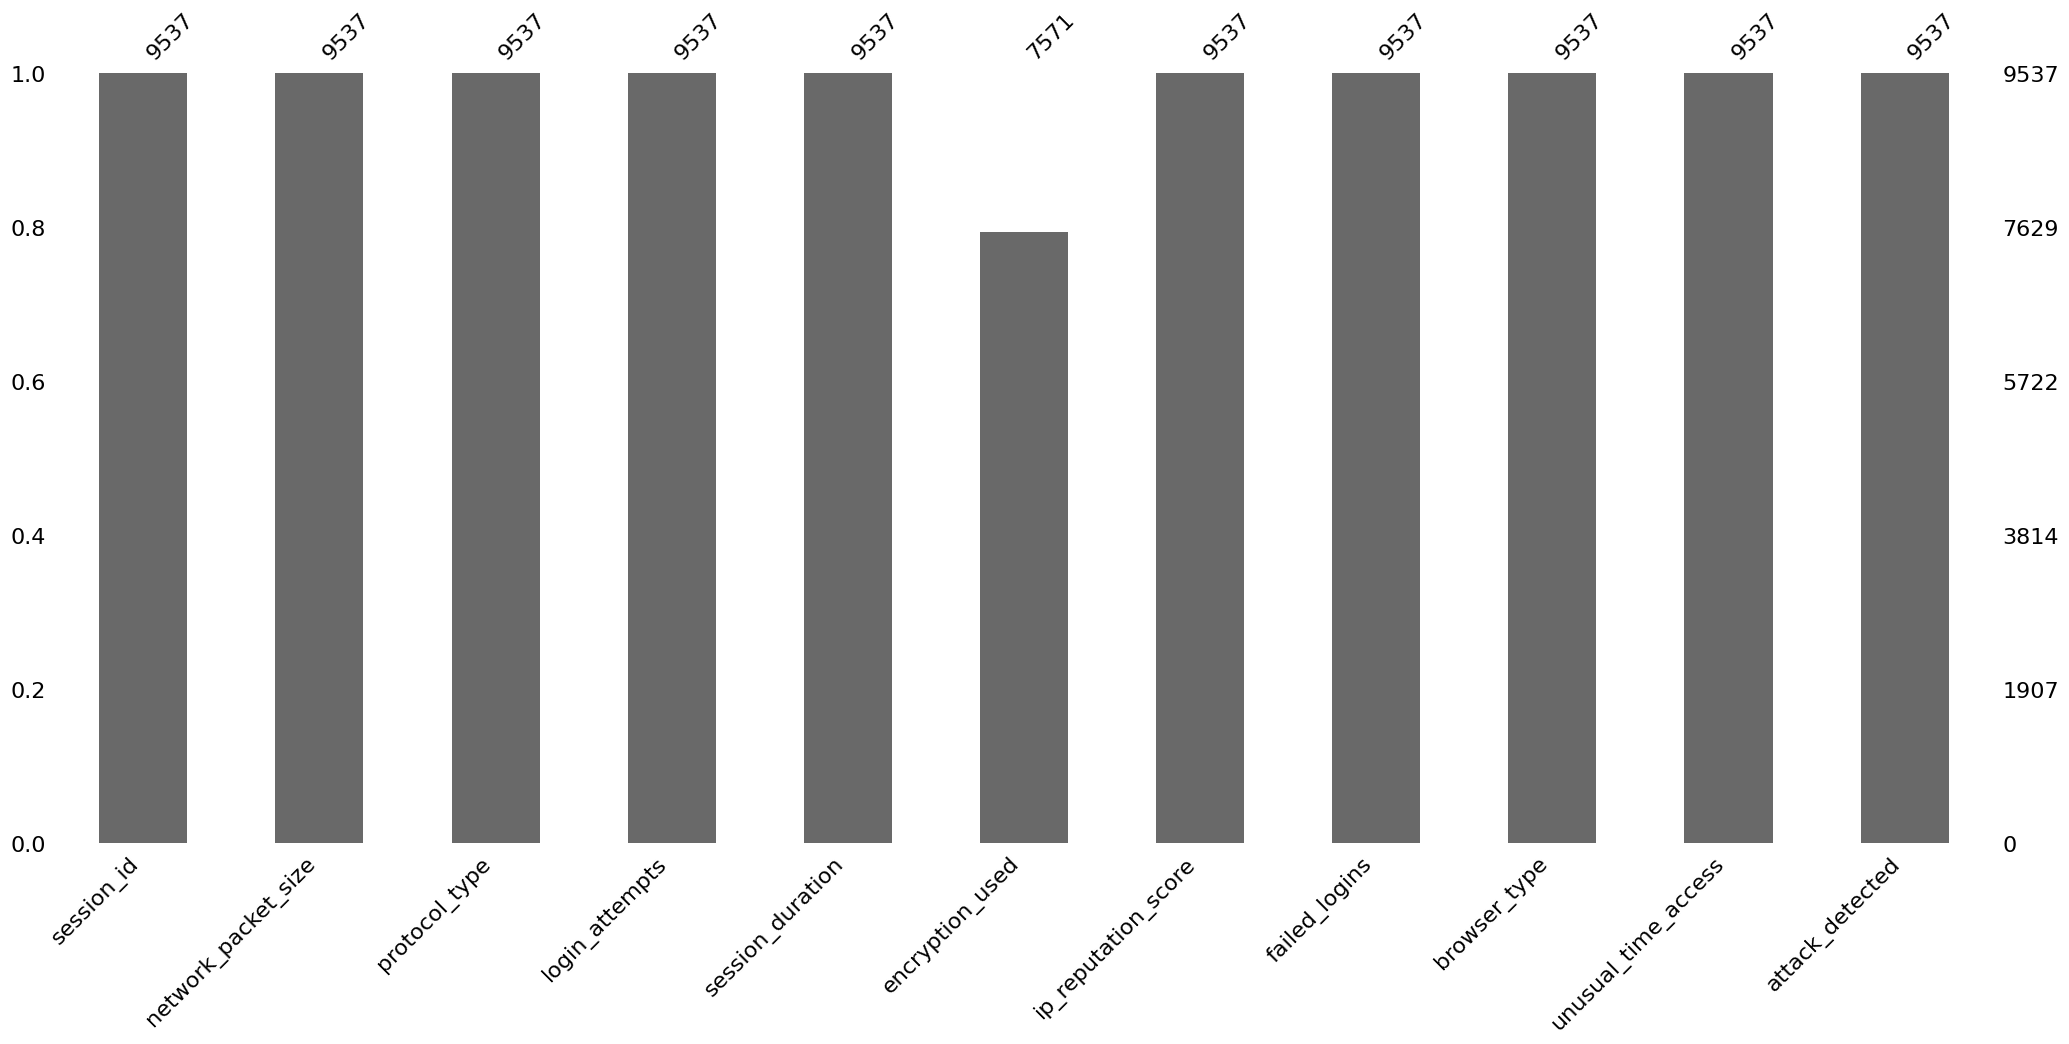

In [21]:
# Plot displaying the missing values in the column named encryption_used
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

In [77]:
# Fill missing values with "No Data"
data=data.fillna("No Data")

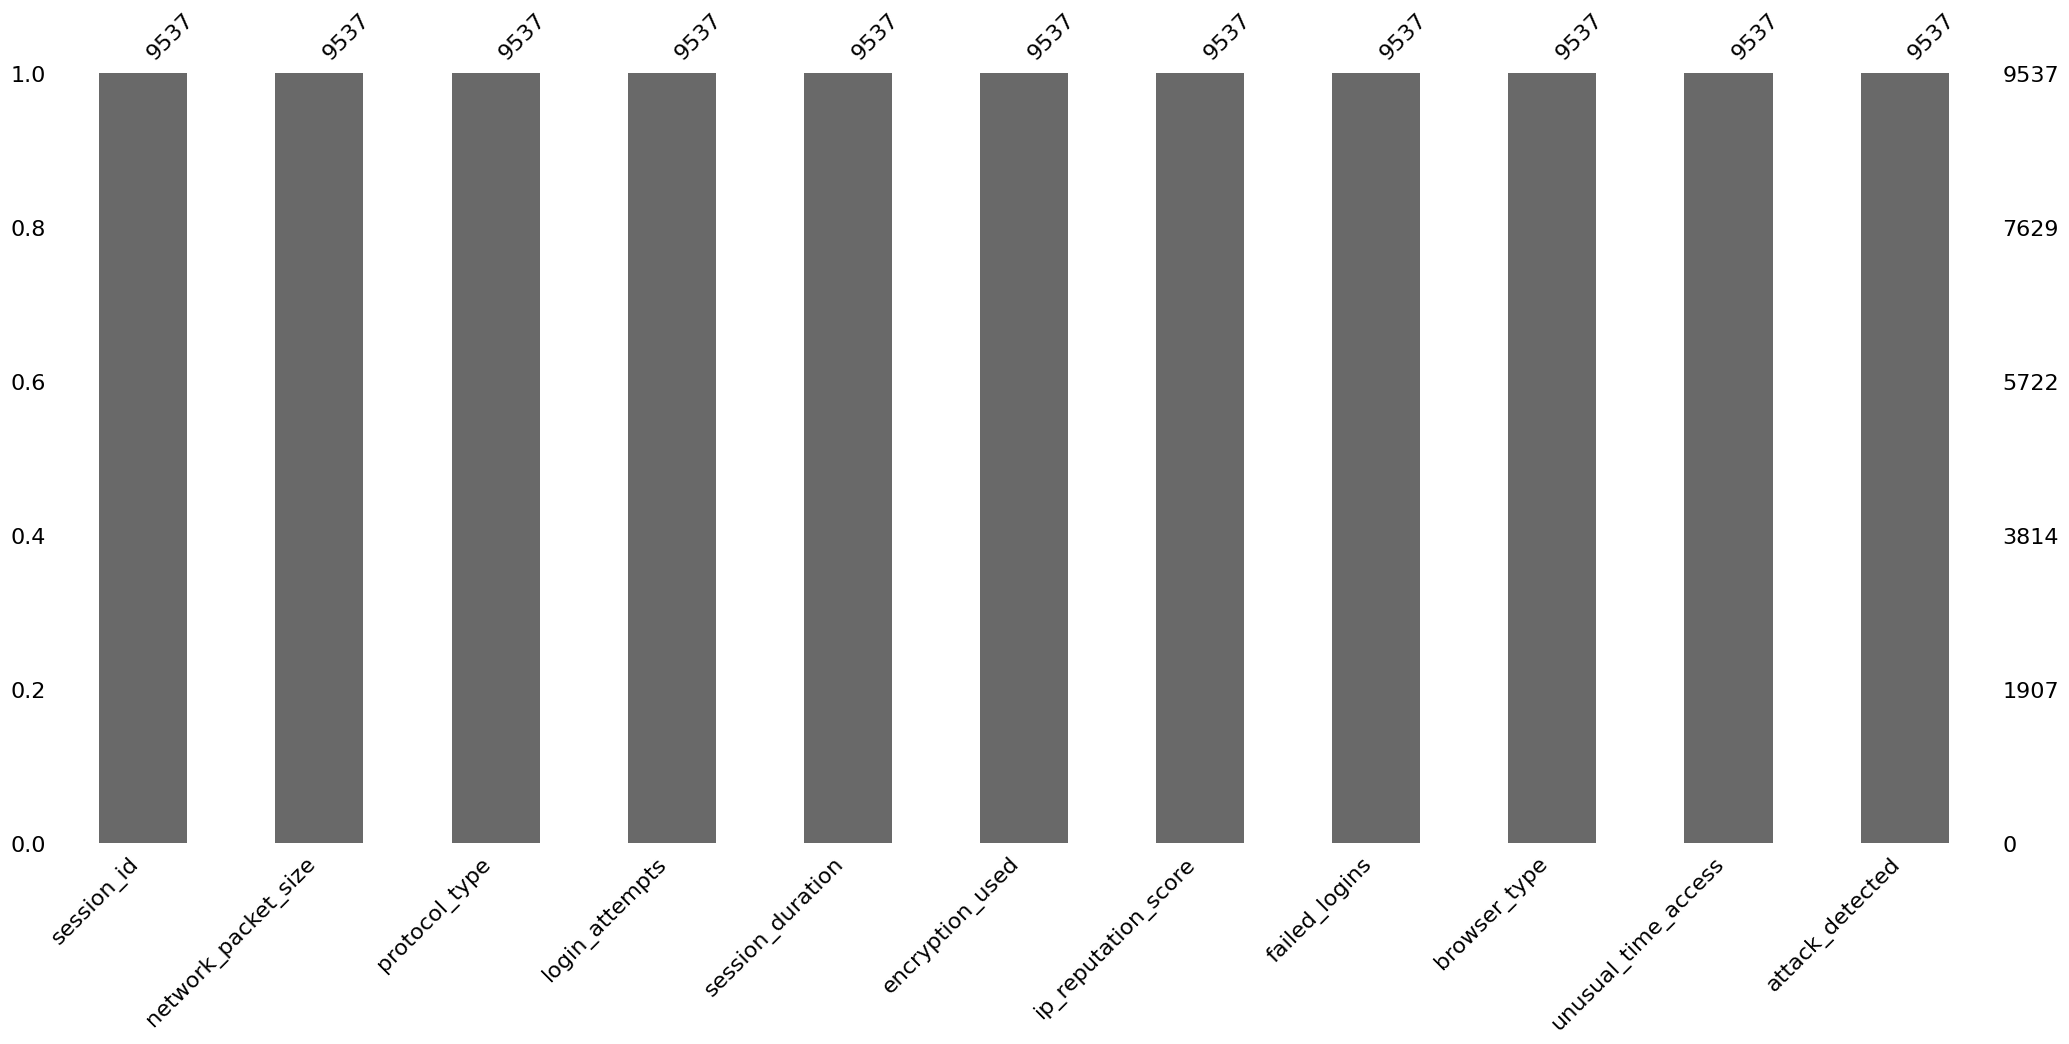

In [78]:
# Plot showing that there are no more missing values in the dataset
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

# Handing Catagorical attributes

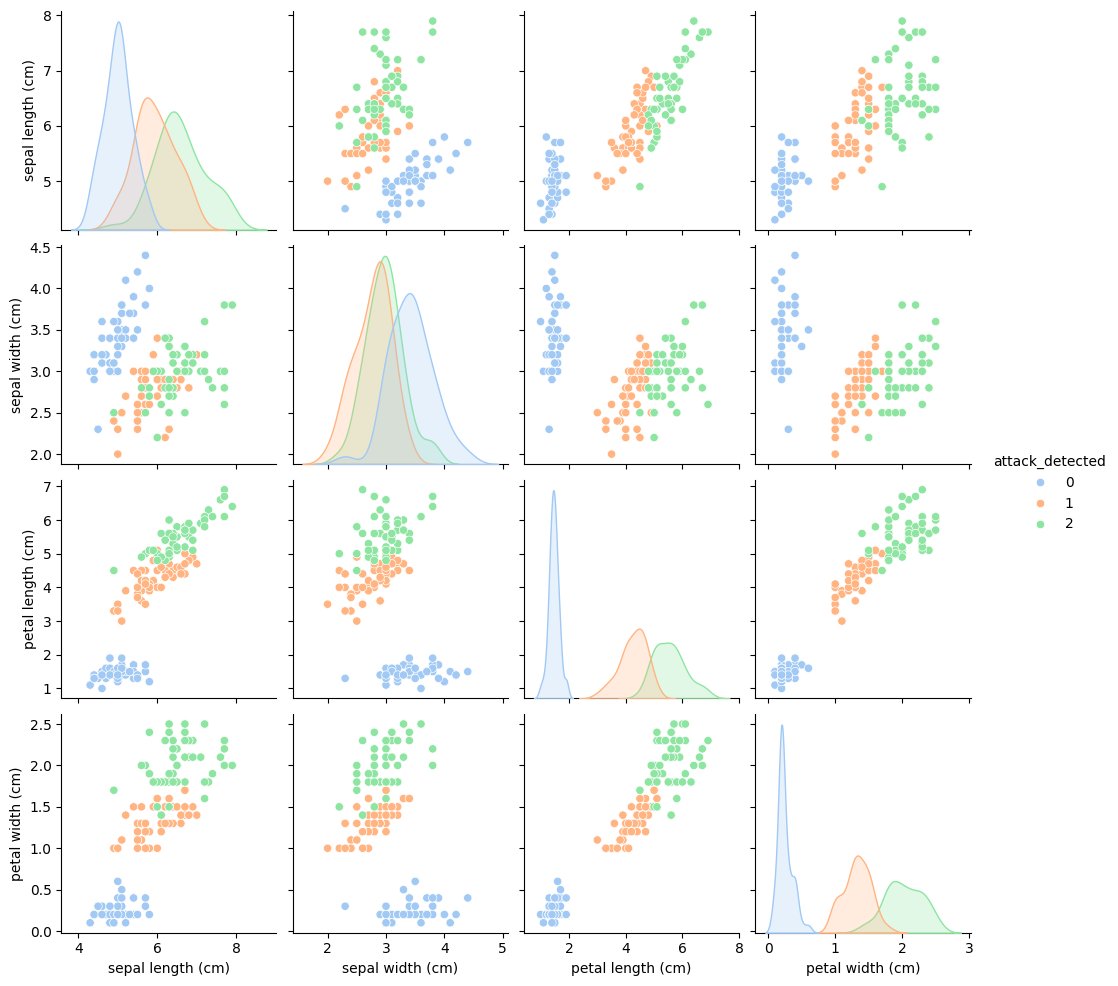

In [79]:


# Load dataset from sklearn (you can replace this with your own CSV if needed)
bunch = load_iris()

# Convert Bunch to DataFrame
data = pd.DataFrame(bunch.data, columns=bunch.feature_names)

# Add target column (renaming it to match your 'attack_detected')
data['attack_detected'] = bunch.target

# If 'session_id' exists in your actual dataset, this line will work. Otherwise skip it.
# data = data.drop(["session_id"], axis=1)  # Uncomment only if 'session_id' is a column

# Convert all object columns to category
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')

# Plot
sns.pairplot(data, hue="attack_detected", palette="pastel")
plt.show()


In [ ]:
data.dtypes

In [80]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# # encode all columns that are not of type integer or float (i.e., categorical columns)
# for col in data.select_dtypes(exclude=['int64', 'float64']).columns:
#     data[col] = label_encoder.fit_transform(data[col])
import pandas as pd

# One-hot encode all object or category columns
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.dtypes

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt=".2f",  cmap="Accent" , linewidth=.9, annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

In [ ]:
data

In [81]:
y=data["attack_detected"].values
x=data.drop(["attack_detected"],axis=1)

## Feature Importance score using Random Forest Classifier

## Selecting three features having max importance score

In [82]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from IPython.display import display  # Optional; use only in Jupyter notebooks

# Load example dataset
iris_data = load_iris()
x_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y_iris = pd.Series(iris_data.target)

# Initialize and fit the Random Forest model
rf_importance = RandomForestClassifier(random_state=42)
rf_importance.fit(x_iris, y_iris)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': x_iris.columns,
    'importance': rf_importance.feature_importances_
})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
display(feature_importances)  # Use print(feature_importances) if not in Jupyter

Feature Importances:


,feature,importance
2,petal length (cm),0.436130
3,petal width (cm),0.436065
0,sepal length (cm),0.106128
1,sepal width (cm),0.021678


In [83]:
# Select top N features based on importance (you can adjust N)
n_features = 3  # Example: select top 10 features
top_features = feature_importances['feature'][:n_features].tolist()
print(top_features)
# Create new dataframes with selected features
x_selected = x[top_features]
y_selected = y  # Target variable remains the same

print(f"Selected features ({n_features}):")
print(top_features)

['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']
Selected features (3):
['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']


In [ ]:
from sklearn.model_selection import train_test_split
x_selected_train,x_selected_test,y_selected_train,y_selected_test = train_test_split(x_selected,y_selected,test_size=0.2,random_state=42)

## KNN with selected features(most important)

In [84]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_selected = selector.fit_transform(X, y)

# Split data
x_selected_train, x_selected_test, y_selected_train, y_selected_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# GridSearchCV for best k
param_grid = {'n_neighbors': range(1, 21)}
grid_search_selected = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_selected.fit(x_selected_train, y_selected_train)

# Best results
best_n_neighbors_selected = grid_search_selected.best_params_['n_neighbors']
best_score_selected = grid_search_selected.best_score_

print(f"Best number of neighbors (Selected Features): {best_n_neighbors_selected}")
print(f"Best cross-validation accuracy (Selected Features): {best_score_selected:.2f}")

# Train best model
knn_tuned_selected = KNeighborsClassifier(n_neighbors=best_n_neighbors_selected)
knn_tuned_selected.fit(x_selected_train, y_selected_train)

# Predict and evaluate
y_pred_knn_tuned_selected = knn_tuned_selected.predict(x_selected_test)

print("\nTuned KNN Classification Report with Selected Features:")
print(classification_report(y_selected_test, y_pred_knn_tuned_selected))

print("\nTuned KNN Confusion Matrix with Selected Features:")
print(confusion_matrix(y_selected_test, y_pred_knn_tuned_selected))


Best number of neighbors (Selected Features): 7
Best cross-validation accuracy (Selected Features): 0.96

Tuned KNN Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Tuned KNN Confusion Matrix with Selected Features:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Random Forest with selected features(most important)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest classifier with selected features
rf_selected = RandomForestClassifier(random_state=42)

# Train the model
rf_selected.fit(x_selected_train, y_selected_train)

# Predict on the test set
y_pred_rf_selected = rf_selected.predict(x_selected_test)

# Evaluate the model
print("Random Forest Classification Report with Selected Features:")
print(classification_report(y_selected_test, y_pred_rf_selected))
print("\nRandom Forest Confusion Matrix with Selected Features:")
print(confusion_matrix(y_selected_test, y_pred_rf_selected))

Random Forest Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Confusion Matrix with Selected Features:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Decision tree with selected features(most important)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree classifier with selected features
dt_selected = DecisionTreeClassifier(random_state=42)

# Train the model
dt_selected.fit(x_selected_train, y_selected_train)

# Predict on the test set
y_pred_dt_selected = dt_selected.predict(x_selected_test)

# Evaluate the model
print("Decision Tree Classification Report with Selected Features:")
print(classification_report(y_selected_test, y_pred_dt_selected))
print("\nDecision Tree Confusion Matrix with Selected Features:")
print(confusion_matrix(y_selected_test, y_pred_dt_selected))

Decision Tree Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Confusion Matrix with Selected Features:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Combined ROC curve for all four models

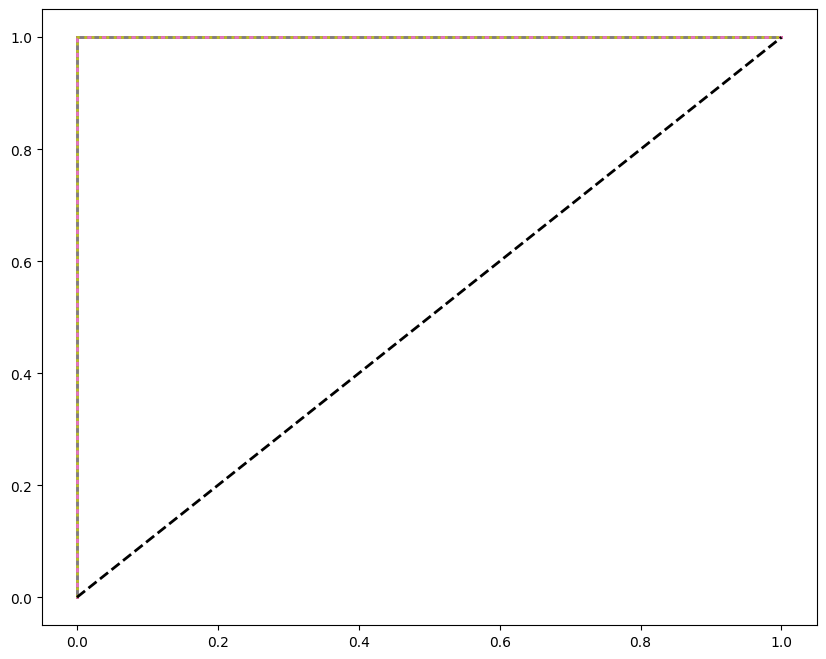

In [87]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels for multiclass ROC
y_test_bin = label_binarize(y_selected_test, classes=np.unique(y_selected_test))
n_classes = y_test_bin.shape[1]

# Train OvR classifiers
knn_ovr = OneVsRestClassifier(knn_tuned_selected)
dt_ovr = OneVsRestClassifier(dt_selected)
rf_ovr = OneVsRestClassifier(rf_selected)

# Fit them (optional if models are already trained)
knn_ovr.fit(x_selected_train, y_selected_train)
dt_ovr.fit(x_selected_train, y_selected_train)
rf_ovr.fit(x_selected_train, y_selected_train)

# Get probability predictions
y_score_knn = knn_ovr.predict_proba(x_selected_test)
y_score_dt = dt_ovr.predict_proba(x_selected_test)
y_score_rf = rf_ovr.predict_proba(x_selected_test)

# Plot ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'KNN (class {i}) AUC = {roc_auc[i]:.2f}')

    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, linestyle='--', label=f'DT (class {i}) AUC = {roc_auc[i]:.2f}')

    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, linestyle=':', label=f'RF (class {i}) AUC = {roc_auc[i]:.2f}')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)


# Normal

In [88]:
from sklearn.datasets import load_iris  # or load_your_dataset
import pandas as pd

# Load the Bunch object
bunch = load_iris()  # or your actual dataset

# Convert to DataFrame
data = pd.DataFrame(bunch.data, columns=bunch.feature_names)

# Add target column (renamed to match your code)
data["attack_detected"] = bunch.target

# Now this will work:
y = data["attack_detected"].values
x = data.drop(["attack_detected"], axis=1)


In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [91]:
x_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [ ]:
y_train

In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
x_test

##KNN without selected features

In [93]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)} # Test k from 1 to 20

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

# Initialize and train the KNN classifier with the best parameters
knn_tuned = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_tuned.fit(x_train, y_train)

# Predict on the test set
y_pred_knn_tuned = knn_tuned.predict(x_test)

# Evaluate the tuned model
print("\nTuned KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_tuned))
print("\nTuned KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_tuned))

Best number of neighbors: 3
Best cross-validation accuracy: 0.95

Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         9
           2       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30


Tuned KNN Confusion Matrix:
[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

## Decision tree without selected features

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Suppose you have your full data in variables x (features) and y (target)
# Split the data into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(x_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Random Forest without selected features

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##Combine ROC curve graph for all the models with no feature selection.

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)


Decision Tree Accuracy: 0.8685
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1001
           1       0.87      0.86      0.87       999

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000


Random Forest Accuracy: 0.9485
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1001
           1       0.96      0.94      0.95       999

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


KNN Accuracy: 0.9665
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1001
           1       0.98      0.96      0.97       999

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.9

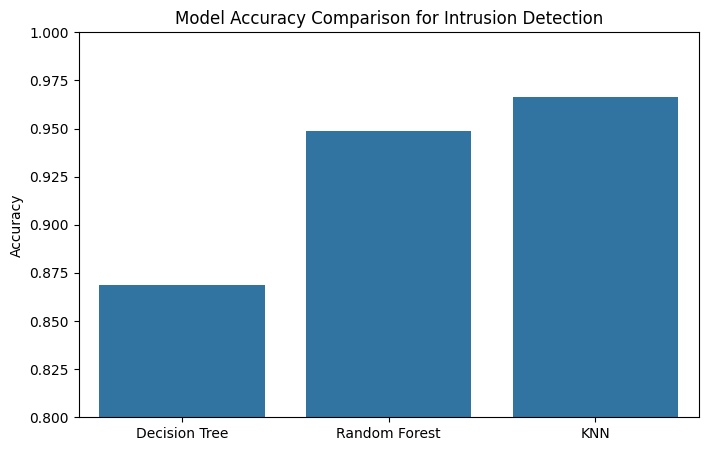

In [98]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=15, n_redundant=5,
                           n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)


dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)


dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test_scaled)


models = {'Decision Tree': dt_pred, 'Random Forest': rf_pred, 'KNN': knn_pred}
accuracies = {}

for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    accuracies[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, pred))


plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison for Intrusion Detection')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()